1. Policyholder Information: This includes demographic details such as age,
gender, occupation, marital status, and geographical location.
2. Claim History: Information regarding past insurance claims, including claim
amounts, types of claims (e.g., medical, automobile), frequency of claims, and
claim durations.
3. Policy Details: Details about the insurance policies held by the policyholders,
such as coverage type, policy duration, premium amount, and deductibles.
4. Risk Factors: Variables indicating potential risk factors associated with
policyholders, such as credit score, driving record (for automobile insurance),
health status (for medical insurance), and property characteristics (for home
insurance).
5. External Factors: Factors external to the policyholders that may influence claim
likelihood, such as economic indicators, weather conditions, and regulatory
changes

## Data Preprocessing 

# Task 1: Data Cleaning and Initial Processing

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('data.csv')

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Identify boolean columns (those with Yes/No values)
boolean_columns = []
for column in df.columns:
    if df[column].dtype == 'object':  # Check if column is string type
        if set(df[column].unique()) == {'Yes', 'No'} or set(df[column].unique()) == {'No', 'Yes'}:
            boolean_columns.append(column)

print("Columns containing Yes/No values:", boolean_columns)

# Replace Yes/No with 1/0 for these columns
for column in boolean_columns:
    df[column] = df[column].map({'Yes': 1, 'No': 0})

continuous_features = ['vehicle_age', 'customer_age', 
                      'displacement', 'turning_radius', 'length', 'width', 'gross_weight']
scaler = StandardScaler()
df[continuous_features] = scaler.fit_transform(df[continuous_features])

# Display summary statistics of standardized features
print("\nSummary statistics of standardized features:")
print(df[continuous_features].describe())

# Define categorical features - these are columns with text or categorical values
categorical_features = ['region_code', 'segment', 'model', 'fuel_type', 'engine_type', 
                       'airbags', 'rear_brakes_type', 'cylinder', 'transmission_type',
                       'steering_type']

# Encode categorical variables
for column in categorical_features:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

# Display first few rows of processed dataset
print("\nFirst few rows of processed dataset:")
display(df.head())

# Basic statistics of the processed dataset
print("\nProcessed dataset statistics:")
print(df.describe())

# Save the cleaned dataset
df.to_csv('cleaned_insurance_claims.csv', index=False)
print("\nCleaned dataset saved successfully!")


Missing values in each column:
policy_id                           0
subscription_length                 0
vehicle_age                         0
customer_age                        0
region_code                         0
region_density                      0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
steering_type                       0
turning_radius                      0
length                              0
width             

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,-0.166143,-0.551353,20,8794,4,5,1,250Nm@2750rpm,...,1,1,1,1,1,0,1,1,3,0
1,POL016745,8.2,0.362770,-1.416462,11,27003,3,10,1,200Nm@1750rpm,...,0,1,1,1,1,1,1,1,4,0
2,POL007194,9.5,-1.047663,-0.118799,20,8794,4,5,1,250Nm@2750rpm,...,1,1,1,1,1,0,1,1,3,0
3,POL018146,5.2,-0.871359,-0.118799,1,73430,0,0,0,60Nm@3500rpm,...,0,0,0,1,0,0,0,1,0,0
4,POL049011,10.1,-0.342447,1.611418,4,5410,2,6,1,200Nm@3000rpm,...,0,1,1,1,0,0,1,1,5,0



Processed dataset statistics:
       subscription_length   vehicle_age  customer_age   region_code  \
count         58592.000000  5.859200e+04  5.859200e+04  58592.000000   
mean              6.111688 -2.053700e-16  1.250896e-16     13.035653   
std               4.142790  1.000009e+00  1.000009e+00      6.803915   
min               0.000000 -1.223968e+00 -1.416462e+00      0.000000   
25%               2.100000 -8.713593e-01 -8.397228e-01      6.000000   
50%               5.700000 -1.661427e-01 -1.187989e-01     15.000000   
75%              10.400000  7.153780e-01  6.021250e-01     20.000000   
max              14.000000  1.640645e+01  4.350929e+00     21.000000   

       region_density       segment         model     fuel_type   engine_type  \
count    58592.000000  58592.000000  58592.000000  58592.000000  58592.000000   
mean     18826.858667      1.938644      4.659237      1.003448      5.502748   
std      17660.174792      1.566329      3.197355      0.835104      2.684796

# Task 2: Exploratory Data Analysis (EDA)

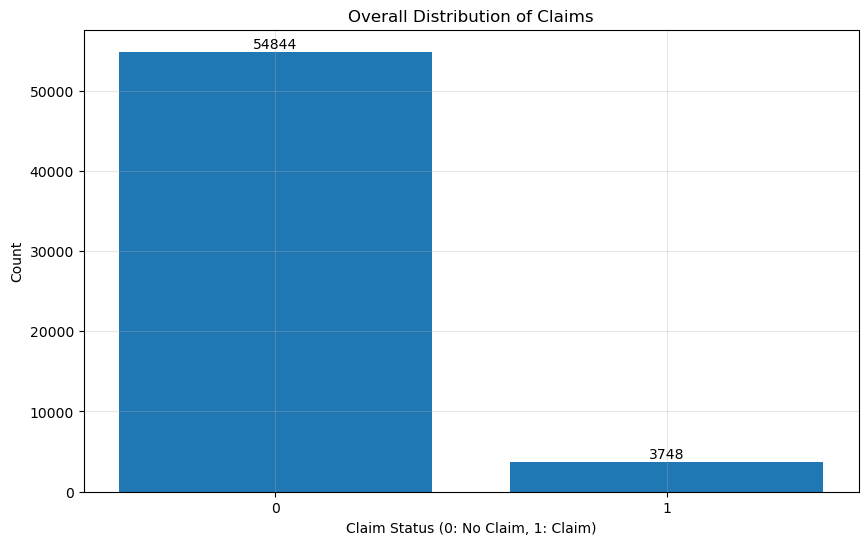


Overall Claim Rate: 6.40%


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Overall Claims Distribution
plt.figure(figsize=(10, 6))
claims_dist = df['claim_status'].value_counts()
plt.bar(claims_dist.index, claims_dist.values, color=['lightblue', 'lightcoral'])
plt.bar(claims_dist.index, claims_dist.values)
plt.title('Overall Distribution of Claims')
plt.xlabel('Claim Status (0: No Claim, 1: Claim)')
plt.ylabel('Count')
plt.text(0, claims_dist[0], f'{claims_dist[0]}', ha='center', va='bottom')
plt.text(1, claims_dist[1], f'{claims_dist[1]}', ha='center', va='bottom')
plt.grid(True, alpha=0.3)
plt.xticks([0, 1])
plt.show()

# Calculate claim rate percentage
claim_rate = (claims_dist[1] / len(df)) * 100
print(f"\nOverall Claim Rate: {claim_rate:.2f}%")

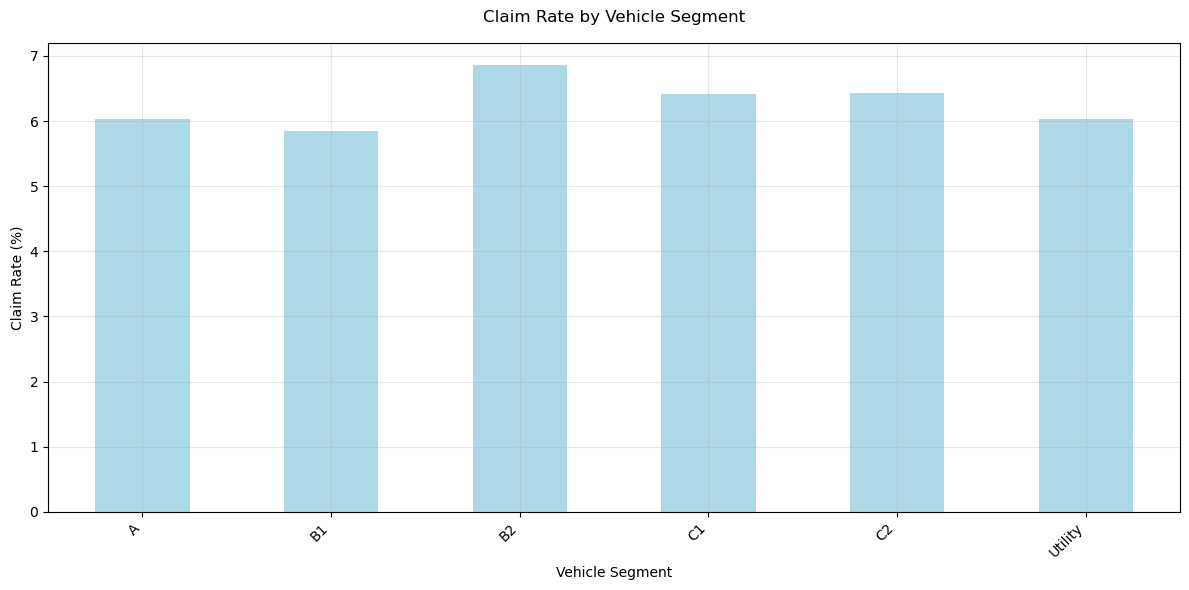


Claim rates by vehicle segment:
segment
B2         6.858141
C2         6.427450
C1         6.409896
A          6.038912
Utility    6.038048
B1         5.847112
Name: 1, dtype: float64


In [45]:
# Read original data to get segment names
original_df = pd.read_csv('data.csv')

# Get mapping of encoded values to original segment names
segment_mapping = dict(zip(df['segment'].unique(), original_df['segment'].unique()))
df['segment'] = df['segment'].map(segment_mapping)

# Claims by Vehicle Segment
segment_claims = pd.crosstab(df['segment'], df['claim_status'], normalize='index') * 100

plt.figure(figsize=(12, 6))
segment_claims[1].plot(kind='bar', color='lightblue')
plt.title('Claim Rate by Vehicle Segment', fontsize=12, pad=15)
plt.xlabel('Vehicle Segment')
plt.ylabel('Claim Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print the claim rates by segment for verification
print("\nClaim rates by vehicle segment:")
print(segment_claims[1].sort_values(ascending=False))

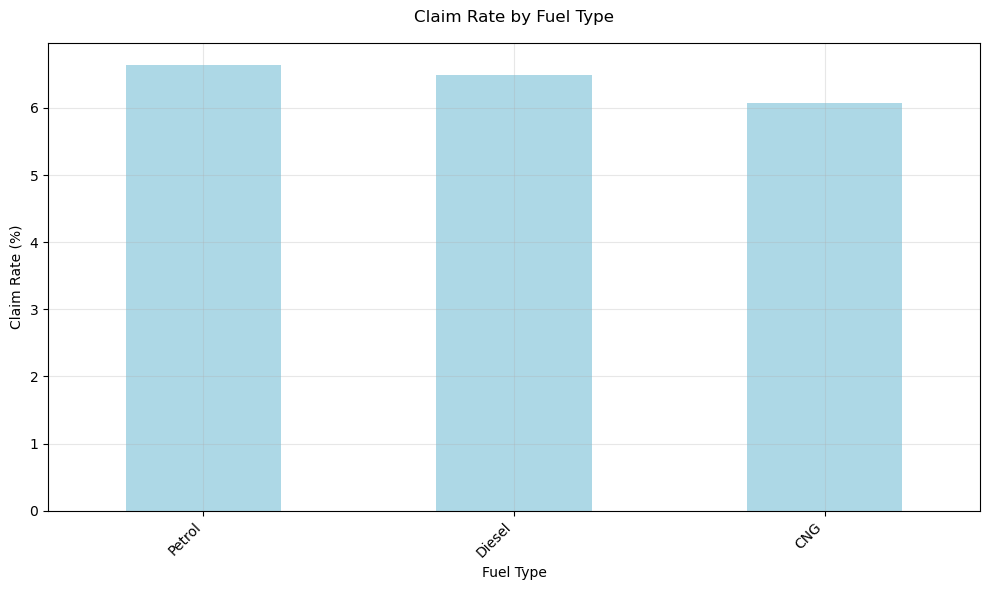


Claim rates by fuel type:
fuel_type
Petrol    6.638418
Diesel    6.486182
CNG       6.074766
Name: 1, dtype: float64


In [50]:
# Claims by Fuel Type
plt.figure(figsize=(10, 6))
fuel_claims = pd.crosstab(original_df['fuel_type'], original_df['claim_status'], normalize='index') * 100
fuel_claims[1].sort_values(ascending=False).plot(kind='bar', color='lightblue')
plt.title('Claim Rate by Fuel Type', fontsize=12, pad=15)
plt.xlabel('Fuel Type')
plt.ylabel('Claim Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print the claim rates by fuel type for verification
print("\nClaim rates by fuel type:")
print(fuel_claims[1].sort_values(ascending=False))

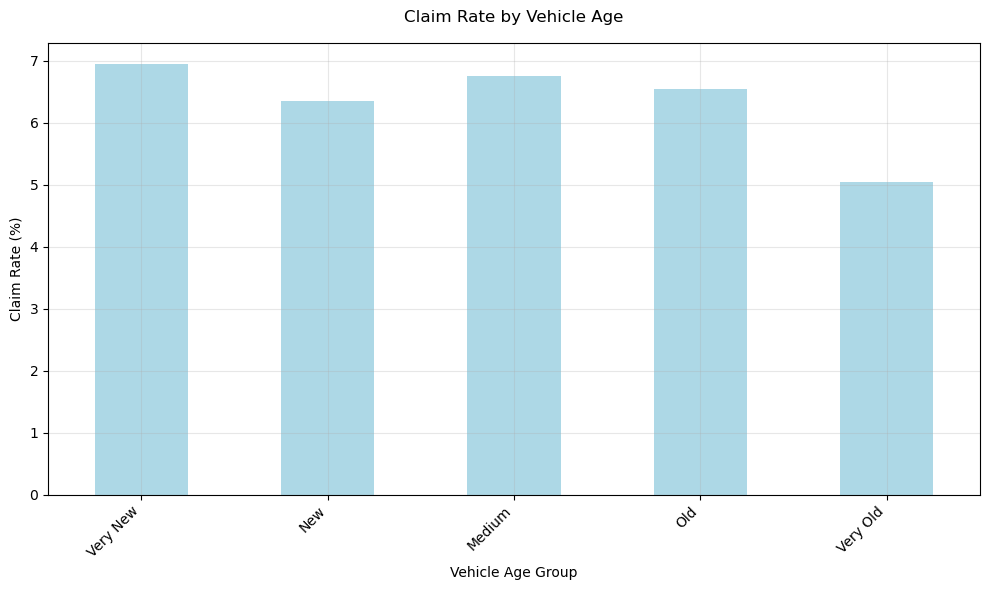


Claim rates by vehicle age groups:
vehicle_age_group
Very New    6.943122
Medium      6.759344
Old         6.542841
New         6.358523
Very Old    5.037228
Name: 1, dtype: float64


In [49]:
# Claims by Vehicle Age Groups 
original_df['vehicle_age_group'] = pd.qcut(original_df['vehicle_age'], q=5, labels=['Very New', 'New', 'Medium', 'Old', 'Very Old'])
plt.figure(figsize=(10, 6))
age_claims = pd.crosstab(original_df['vehicle_age_group'], original_df['claim_status'], normalize='index') * 100
age_claims[1].plot(kind='bar', color='lightblue')
plt.title('Claim Rate by Vehicle Age', fontsize=12, pad=15)
plt.xlabel('Vehicle Age Group')
plt.ylabel('Claim Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print the claim rates by vehicle age for verification
print("\nClaim rates by vehicle age groups:")
print(age_claims[1].sort_values(ascending=False))

<Figure size 1200x600 with 0 Axes>

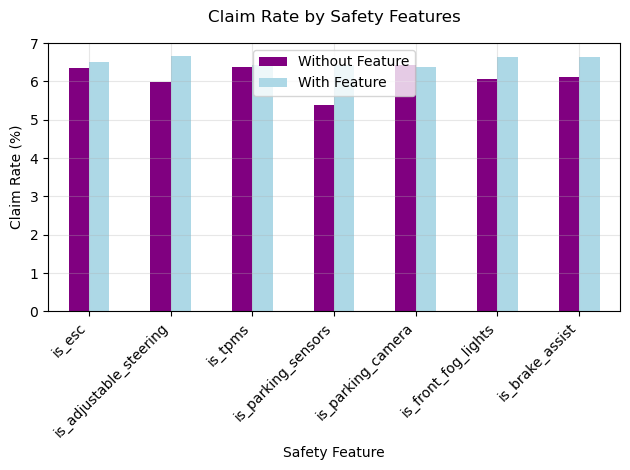

In [54]:
# Safety Features Impact on Claims
safety_features = ['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 
                 'is_parking_camera', 'is_front_fog_lights', 'is_brake_assist']

plt.figure(figsize=(12, 6))
safety_impact = pd.DataFrame()

for feature in safety_features:
   feature_claims = pd.crosstab(original_df[feature], original_df['claim_status'], normalize='index')[1] * 100
   safety_impact[feature] = feature_claims

safety_impact.transpose().plot(kind='bar', color=['purple', 'lightblue'])
plt.title('Claim Rate by Safety Features', fontsize=12, pad=15)
plt.xlabel('Safety Feature')
plt.ylabel('Claim Rate (%)')
plt.legend(['Without Feature', 'With Feature'])
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [60]:
# Print summary statistics for each analysis
print("\nSummary of Claims Analysis:")
print("-" * 50)

print("\nTop 3 fuel types by claim rate:")
print(fuel_claims[1].sort_values(ascending=False).head(3))

print("\nVehicle age group claim rates:")
print(age_claims[1].sort_values(ascending=False))

print("\nRegion density claim rates:")
print(region_claims[1].sort_values(ascending=False))

print("\nSafety features impact on claim rates:")
for feature in safety_features:
    feature_impact = pd.crosstab(df[feature], df['claim_status'], normalize='index')[1]
    reduction = feature_impact.iloc[0] - feature_impact.iloc[1]
    print(f"{feature}: {'Reduces' if reduction > 0 else 'Increases'} claim rate by {abs(reduction):.2f}%")


Summary of Claims Analysis:
--------------------------------------------------

Top 3 fuel types by claim rate:
fuel_type
Petrol    6.638418
Diesel    6.486182
CNG       6.074766
Name: 1, dtype: float64

Vehicle age group claim rates:
vehicle_age_group
Very New    6.943122
Medium      6.759344
Old         6.542841
New         6.358523
Very Old    5.037228
Name: 1, dtype: float64

Region density claim rates:
region_density
35036    10.743802
16733     8.212560
7788      7.677596
21622     7.669173
3264      7.651715
27742     7.457983
4076      7.097197
27003     7.082539
8794      6.986964
13051     6.179775
6108      5.940594
34738     5.774466
16206     5.735661
5410      5.696757
34791     5.475142
4990      5.177112
6112      5.029995
17804     4.974396
290       4.928664
73430     4.690967
20905     4.587156
65567     3.861789
Name: 1, dtype: float64

Safety features impact on claim rates:
is_esc: Increases claim rate by 0.00%
is_adjustable_steering: Increases claim rate by 0.01%

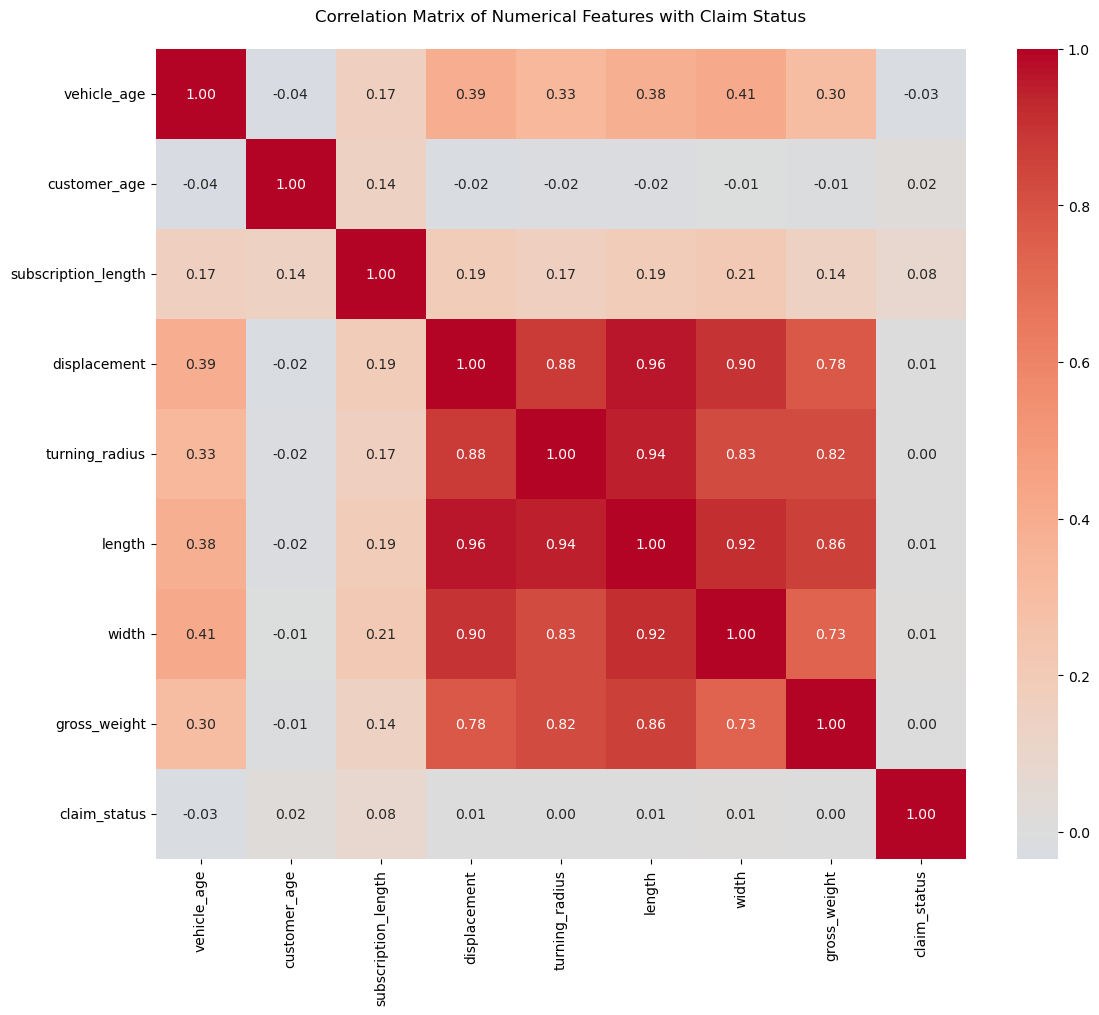


Correlation with claim_status:
claim_status           1.000000
subscription_length    0.078738
customer_age           0.022234
width                  0.009947
displacement           0.007678
length                 0.006495
gross_weight           0.003894
turning_radius         0.002724
vehicle_age           -0.028172
Name: claim_status, dtype: float64


In [63]:
# First, let's identify numerical columns that we want to analyze
numerical_features = ['vehicle_age', 'customer_age', 'subscription_length',
                      'displacement', 'turning_radius', 'length', 'width', 
                     'gross_weight', 'claim_status']

# Create correlation matrix
correlation_matrix = df[numerical_features].corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            square=True)

plt.title('Correlation Matrix of Numerical Features with Claim Status', pad=20)
plt.tight_layout()
plt.show()

# Print the correlation with claim_status specifically
print("\nCorrelation with claim_status:")
claim_correlations = correlation_matrix['claim_status'].sort_values(ascending=False)
print(claim_correlations)

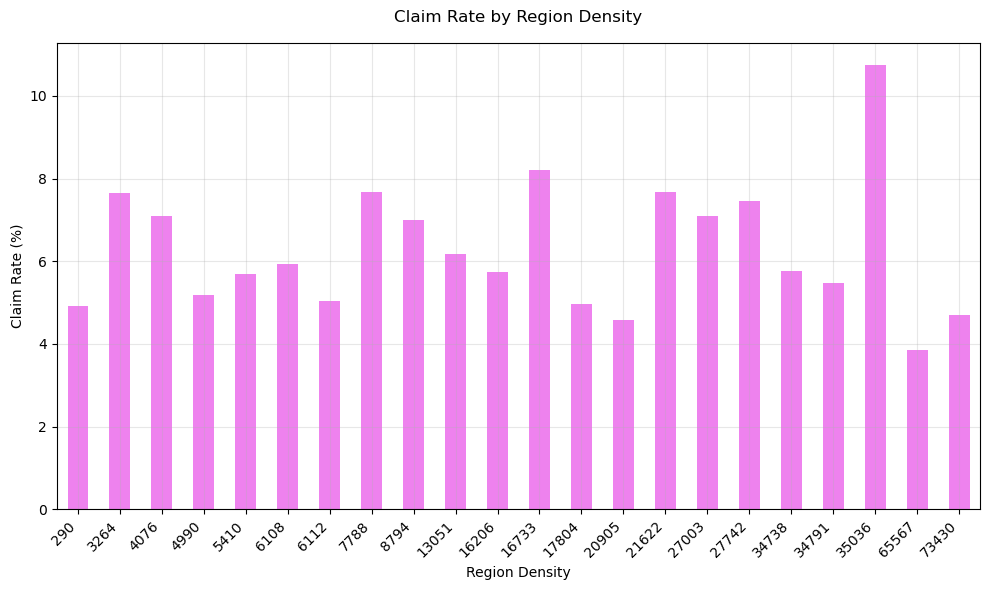


Claim rates by region density:
region_density
290       4.928664
3264      7.651715
4076      7.097197
4990      5.177112
5410      5.696757
6108      5.940594
6112      5.029995
7788      7.677596
8794      6.986964
13051     6.179775
16206     5.735661
16733     8.212560
17804     4.974396
20905     4.587156
21622     7.669173
27003     7.082539
27742     7.457983
34738     5.774466
34791     5.475142
35036    10.743802
65567     3.861789
73430     4.690967
Name: 1, dtype: float64


In [75]:
# Claims by Region Density
plt.figure(figsize=(10, 6))
region_claims = pd.crosstab(original_df['region_density'], original_df['claim_status'], normalize='index') * 100
region_claims[1].sort_index().plot(kind='bar', color='violet')
plt.title('Claim Rate by Region Density', fontsize=12, pad=15)
plt.xlabel('Region Density')
plt.ylabel('Claim Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print the claim rates by region for verification
print("\nClaim rates by region density:")
print(region_claims[1].sort_index())

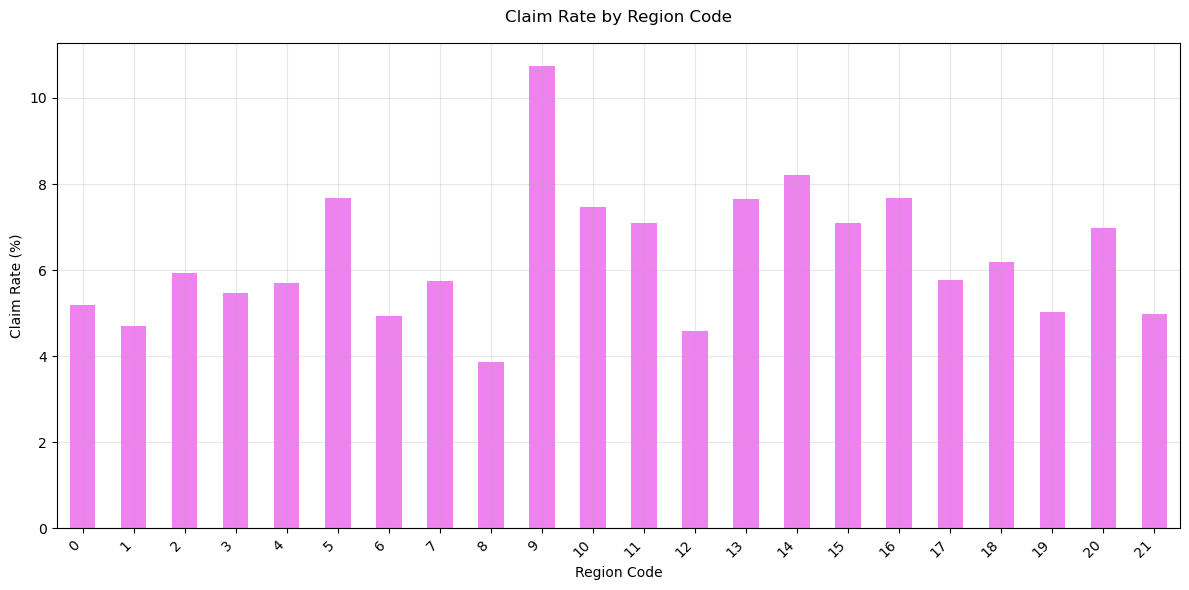


Claim rates by region density:
region_code
0      5.177112
1      4.690967
2      5.940594
3      5.475142
4      5.696757
5      7.677596
6      4.928664
7      5.735661
8      3.861789
9     10.743802
10     7.457983
11     7.082539
12     4.587156
13     7.651715
14     8.212560
15     7.097197
16     7.669173
17     5.774466
18     6.179775
19     5.029995
20     6.986964
21     4.974396
Name: 1, dtype: float64


In [82]:
# Claims by Region Code
plt.figure(figsize=(12, 6))
region_code_claims = pd.crosstab(df['region_code'], df['claim_status'], normalize='index') * 100
region_code_claims[1].sort_index().plot(kind='bar', color='violet')
plt.title('Claim Rate by Region Code', fontsize=12, pad=15)
plt.xlabel('Region Code')
plt.ylabel('Claim Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print the claim rates by region for verification
print("\nClaim rates by region density:")
print(region_code_claims[1].sort_index())


Claim rates by Region Code and Density:
region_code  region_density
9            35036             10.743802
14           16733              8.212560
5            7788               7.677596
16           21622              7.669173
13           3264               7.651715
10           27742              7.457983
15           4076               7.097197
11           27003              7.082539
20           8794               6.986964
18           13051              6.179775
Name: 1, dtype: float64


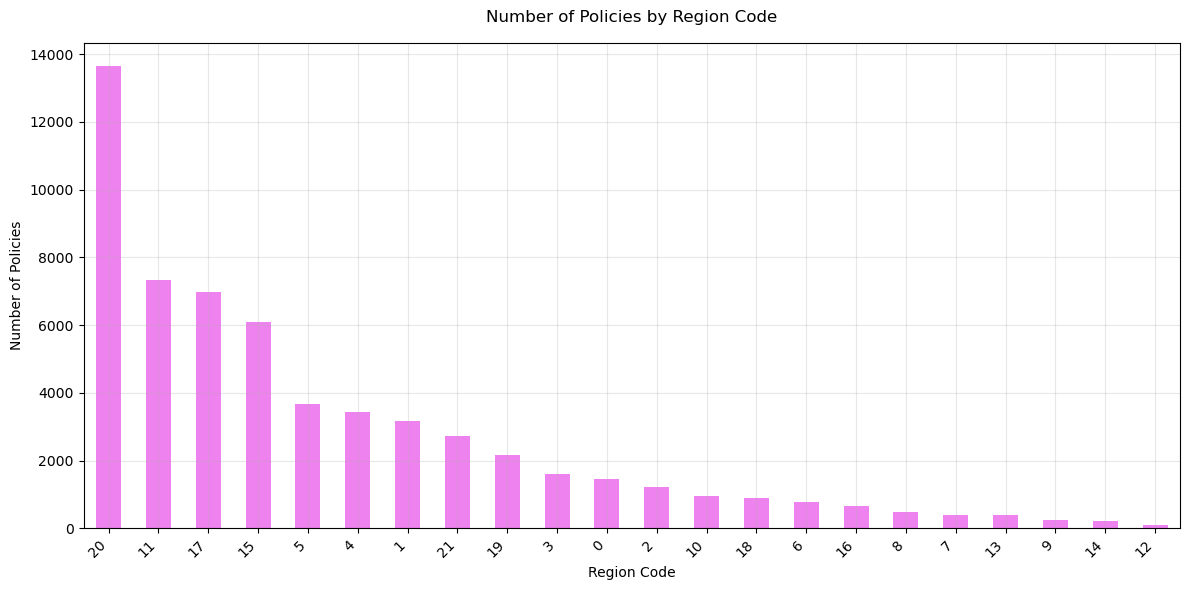

In [83]:
# Average claim rate for each combination of region_code and region_density
region_combined = pd.crosstab([df['region_code'], df['region_density']], 
                            df['claim_status'], normalize='index') * 100
print("\nClaim rates by Region Code and Density:")
print(region_combined[1].sort_values(ascending=False).head(10))

# Number of policies in each region
plt.figure(figsize=(12, 6))
region_size = df['region_code'].value_counts()
region_size.plot(kind='bar', color='violet')
plt.title('Number of Policies by Region Code', fontsize=12, pad=15)
plt.xlabel('Region Code')
plt.ylabel('Number of Policies')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [84]:
# Statistical summary
print("\nRegional Analysis Summary:")
print("-" * 50)

# Highest claim rate regions
print("\nTop 5 regions by claim rate:")
top_regions = region_code_claims[1].sort_values(ascending=False).head()
print(top_regions)

# Region density distribution
print("\nDistribution of policies across region densities:")
density_dist = df['region_density'].value_counts()
print(density_dist)

# Chi-square test for independence between region and claims
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['region_code'], df['claim_status'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print("\nChi-square test for independence between region and claims:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.4f}")
print("Interpretation: " + ("There is a significant relationship between region and claims" 
                          if p_value < 0.05 else 
                          "No significant relationship between region and claims"))

# Calculate and print the regional risk factors
risk_factors = pd.DataFrame({
    'claim_rate': region_code_claims[1],
    'policy_count': df['region_code'].value_counts(),
    'avg_density': df.groupby('region_code')['region_density'].mean()
}).sort_values('claim_rate', ascending=False)

print("\nRegional Risk Factor Analysis:")
print(risk_factors.head(10))


Regional Analysis Summary:
--------------------------------------------------

Top 5 regions by claim rate:
region_code
9     10.743802
14     8.212560
5      7.677596
16     7.669173
13     7.651715
Name: 1, dtype: float64

Distribution of policies across region densities:
region_density
8794     13654
27003     7342
34738     6979
4076      6101
7788      3660
5410      3423
73430     3155
17804     2734
6112      2167
34791     1589
4990      1468
6108      1212
27742      952
13051      890
290        771
21622      665
65567      492
16206      401
3264       379
35036      242
16733      207
20905      109
Name: count, dtype: int64

Chi-square test for independence between region and claims:
Chi-square statistic: 96.08
p-value: 0.0000
Interpretation: There is a significant relationship between region and claims

Regional Risk Factor Analysis:
             claim_rate  policy_count  avg_density
region_code                                       
9             10.743802           24

In [85]:
# Get unique original region codes from the original dataset
original_df = pd.read_csv('data.csv')

# Create a DataFrame showing the mapping
mapping_df = pd.DataFrame({
    'Original_Region_Code': original_df['region_code'].unique(),
    'Standardized_Value': df['region_code'].unique()
})

# Sort by original region code for better readability
mapping_df = mapping_df.sort_values('Original_Region_Code')

print("Mapping between Original and Standardized Region Codes:")
print(mapping_df)

Mapping between Original and Standardized Region Codes:
   Original_Region_Code  Standardized_Value
12                   C1                   0
2                   C10                   1
11                  C11                   2
15                  C12                   3
3                   C13                   4
13                  C14                   5
9                   C15                   6
18                  C16                   7
14                  C17                   8
19                  C18                   9
7                   C19                  10
1                    C2                  11
21                  C20                  12
17                  C21                  13
20                  C22                  14
6                    C3                  15
16                   C4                  16
5                    C5                  17
10                   C6                  18
4                    C7                  19
0                   

## Risk Segmentation

# Task 1: Customer Segmentation

# Task 2: Anomaly Detection

## Predictive Modeling

# Task 1: Classification Model

In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import shap

# Select features for the model
features = ['vehicle_age', 'customer_age', 'subscription_length',
           'displacement', 'turning_radius', 'length', 'width', 
           'gross_weight', 'region_code', 'region_density']

X = df[features]
y = df['claim_status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Create a balanced dataset
sampler = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sampler.fit_resample(X_train_scaled, y_train)

# Train the model with balanced data
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Set up early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train with balanced data
history = model.fit(
    X_train_balanced, y_train_balanced,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
2194/2194 [==============================] - 2s 737us/step - loss: 0.6376 - accuracy: 0.6261 - val_loss: 0.8611 - val_accuracy: 0.1629
Epoch 2/50
2194/2194 [==============================] - 1s 526us/step - loss: 0.6302 - accuracy: 0.6298 - val_loss: 0.9091 - val_accuracy: 0.1147
Epoch 3/50
2194/2194 [==============================] - 1s 513us/step - loss: 0.6257 - accuracy: 0.6337 - val_loss: 0.8862 - val_accuracy: 0.2540
Epoch 4/50
2194/2194 [==============================] - 1s 529us/step - loss: 0.6221 - accuracy: 0.6358 - val_loss: 0.8679 - val_accuracy: 0.3141
Epoch 5/50
2194/2194 [==============================] - 1s 524us/step - loss: 0.6173 - accuracy: 0.6410 - val_loss: 0.9300 - val_accuracy: 0.2341
Epoch 6/50
2194/2194 [==============================] - 1s 522us/step - loss: 0.6154 - accuracy: 0.6418 - val_loss: 0.8443 - val_accuracy: 0.3523
Epoch 7/50
2194/2194 [==============================] - 1s 522us/step - loss: 0.6116 - accuracy: 0.6440 - val_loss: 0.8544 -

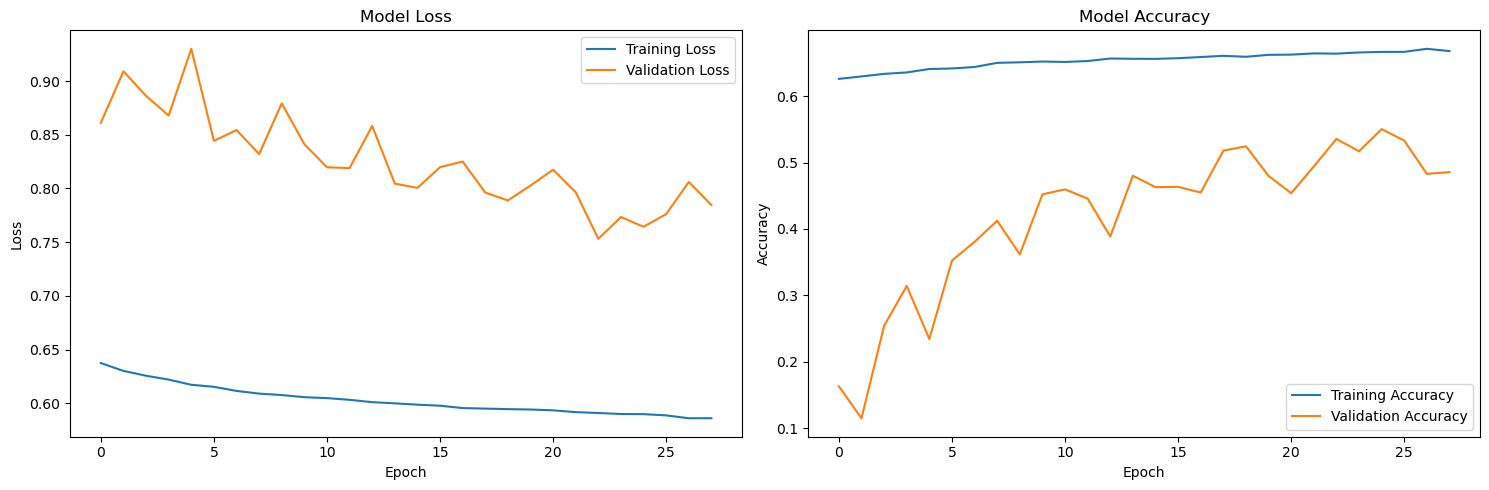

In [16]:
# Plot training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot loss
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()

/opt/anaconda3/envs/PY39_ENV/lib/python3.9/site-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
/opt/anaconda3/envs/PY39_ENV/lib/python3.9/site-packages/keras/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


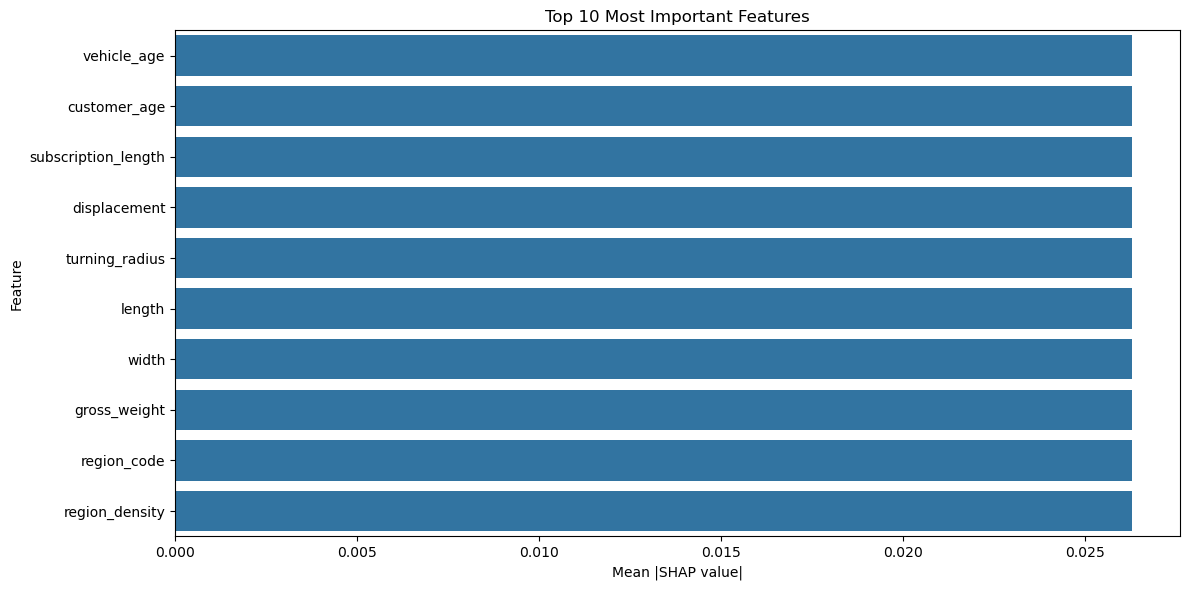

In [17]:
# Calculate SHAP values for feature importance
explainer = shap.DeepExplainer(model, X_train_scaled[:100])
shap_values = explainer.shap_values(X_train_scaled[:100])

# Calculate feature importance with proper reshaping
feature_importance = np.abs(shap_values[0]).mean(0)
feature_importance = feature_importance * np.ones(len(X_train.columns))

# Create DataFrame with lists instead of arrays
feature_importance_df = pd.DataFrame({
    'Feature': list(X_train.columns),
    'Importance': list(feature_importance)
})

# Sort values
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=feature_importance_df,
    x='Importance',
    y='Feature'
)
plt.title('Top 10 Most Important Features')
plt.xlabel('Mean |SHAP value|')
plt.tight_layout()
plt.show()

In [18]:
# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Test Accuracy: 0.7366
Test Loss: 0.5105


# Task 2: Model Evaluation

367/367 [==============================] - 0s 252us/step


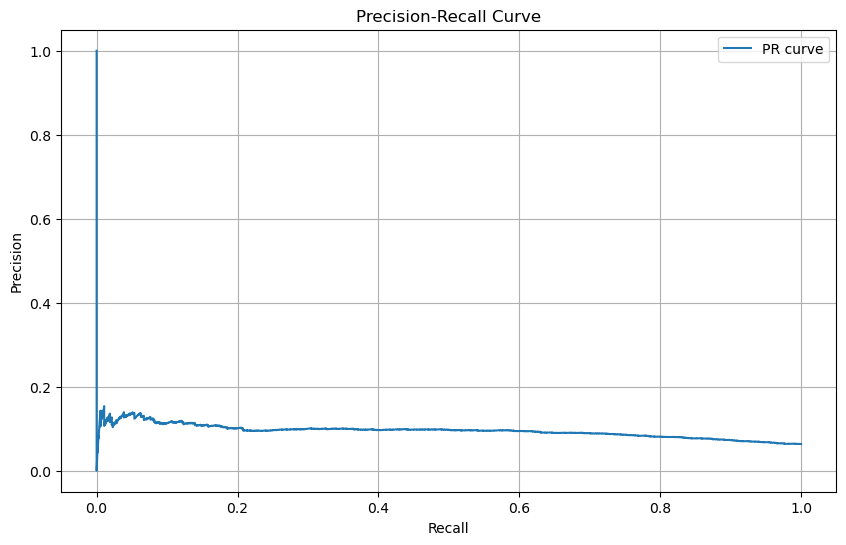

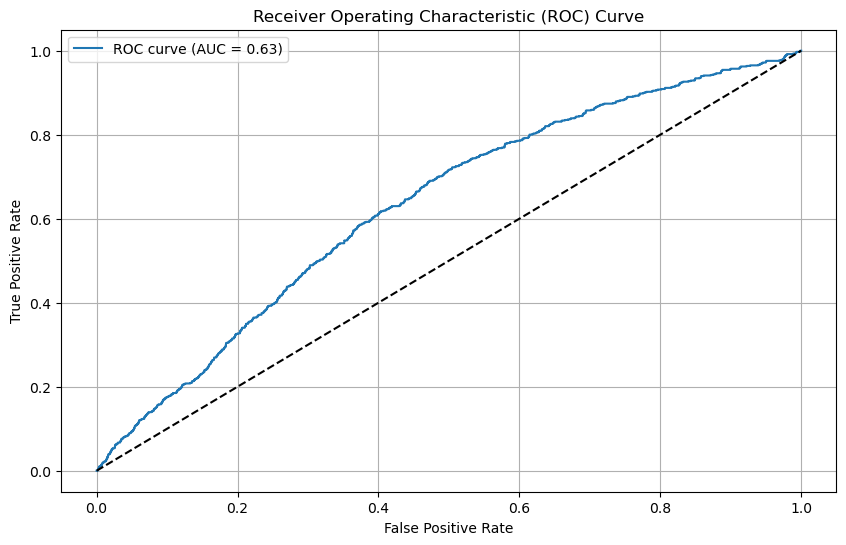

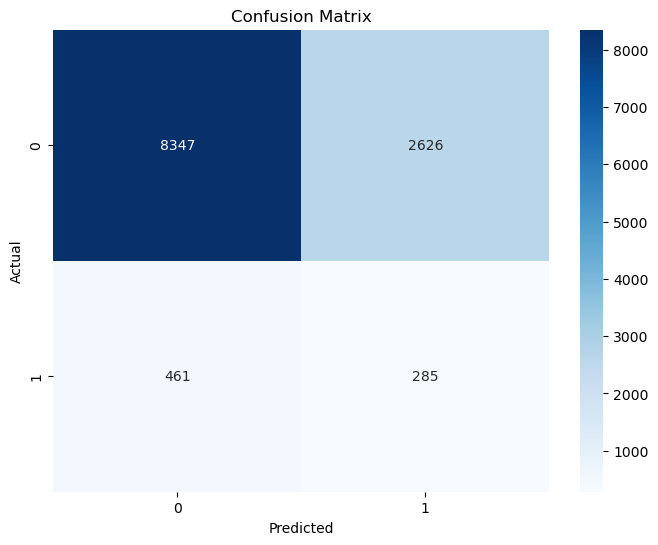


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.76      0.84     10973
           1       0.10      0.38      0.16       746

    accuracy                           0.74     11719
   macro avg       0.52      0.57      0.50     11719
weighted avg       0.89      0.74      0.80     11719



In [19]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc, confusion_matrix

# Get model predictions on test set
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label=f'PR curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

# ROC Curve and AUC Score
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print detailed metrics
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

## Association (?)

# Task 1: Association Rule Mining

# Task 2: Sequential Pattern Analysis   